In [1]:
B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)
v = (3,-2,5)

In [2]:
from vectors import add, scale
def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s, v in zip(scalars, vectors)]
    return add(*scaled)

In [3]:
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*B))

In [4]:
multiply_matrix_vector(B, v)

(1, -2, -2)

In [5]:
from vectors import *
def matrix_multiply(a, b):
    return tuple(
        tuple(dot(row, col) for col in zip(*b)) for row in a
    )

In [6]:
a = ((1,1,0),(1,0,1),(1,-1,1))
b = ((0,2,1),(0,1,0),(1,0,-1))
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [7]:
c = ((1,2), (3,4))
d = ((0,-1),(1,0))
matrix_multiply(c,d)

((2, -1), (4, -3))

In [8]:
def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        return tuple(1 if i==j else 0 for j in range(1, n+1))
    standard_basis = [standard_basis_vector(i) for i in range(1, n+1)]
    cols = [transformation(v) for v in standard_basis]
    return tuple(zip(*cols))
    

In [9]:
from transforms import rotate_z_by
from math import pi
infer_matrix(3, rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

In [10]:
matrix_multiply(((1.3,-0.7),(6.5,3.2)),((-2.5,),(0.3,)))

((-3.46,), (-15.29,))

In [11]:
from random import randint
def random_matrix(rows,cols,min=-2,max=2):
    return tuple(
        tuple(
        randint(min, max) for j in range(0, cols)) 
        for i in range(0, rows)
    )


In [12]:
random_matrix(3,3,0,10)

((0, 7, 2), (10, 10, 2), (6, 7, 6))

In [13]:
def multiply_matrix_vector(matrix, vector):
    return tuple(
      sum(vector_entry * row_entry for vector_entry,row_entry in zip(vector, row))
        for row in matrix
    )

In [14]:
def multiple_matrix_vector(matrix, vector):
    return tuple(
        dot(row, vector) for row in matrix
    )

In [15]:
from transforms import compose

a = ((1,1,0),(1,0,1),(1,-1,1))
b = ((0,2,1),(0,1,0),(1,0,-1))

def transform_a(v):
    return multiply_matrix_vector(a, v)

def transform_b(v):
    return multiply_matrix_vector(b, v)

def compose_a_b(v):
    return compose(transform_a, transform_b)(v)

infer_matrix(3, compose_a_b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [16]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [17]:
def matrix_power(power, matrix):
    result = matrix
    for _ in range(1, power):
        result = matrix_multiply(result, matrix)
    return result

matrix_power(2,((1,0),(0,1)))

((1, 0), (0, 1))

In [18]:
def transpose(matrix):
    return tuple(zip(*matrix))

In [19]:
transpose(((1,),(2,),(3,)))

((1, 2, 3),)

In [20]:
transpose(((1,2,3),))

((1,), (2,), (3,))

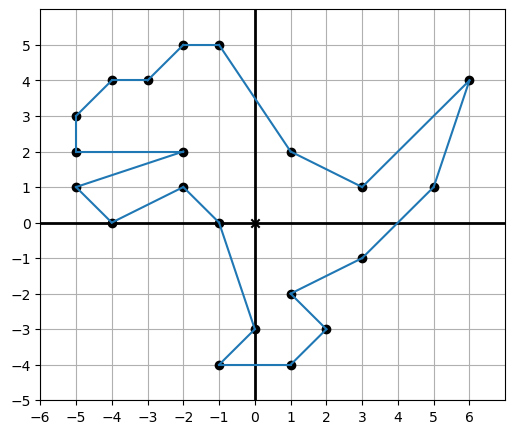

In [54]:
from vector_drawing import *
dino_vectors = [
    (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3),(-5,2),(-2,2),(-5,1),(-4,0),(-2,1),(-1,0),(0,-3),(-1,-4),(1,-4),(2,-3),(1,-2),
    (3,-1),(5,1)
]
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

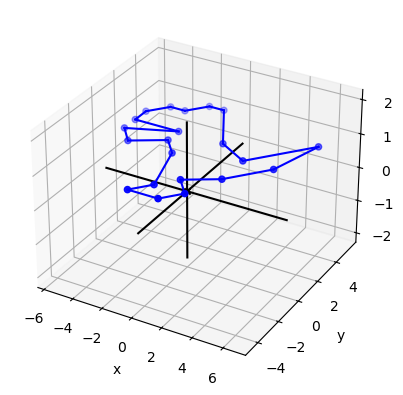

In [22]:
from draw3d import *
def polygon_segments_3d(points, color='blue'):
    count = len(points)
    return [
        Segment3D(points[i], points[(i+1) % count],color=color) for i in range(0, count)
    ]

dino_3d = [(x,y,1) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

In [46]:
magic_matric = (
    (1,0,3),
    (0,1,1),
    (0,0,1)
)

In [48]:
translated = [multiply_matrix_vector(magic_matric, v) for v in dino_3d]

[(9, 5), (6, 2), (4, 3), (2, 6), (1, 6), (0, 5), (-1, 5), (-2, 4), (-2, 3), (1, 3), (-2, 2), (-1, 1), (1, 2), (2, 1), (3, -2), (2, -3), (4, -3), (5, -2), (4, -1), (6, 0), (8, 2)]


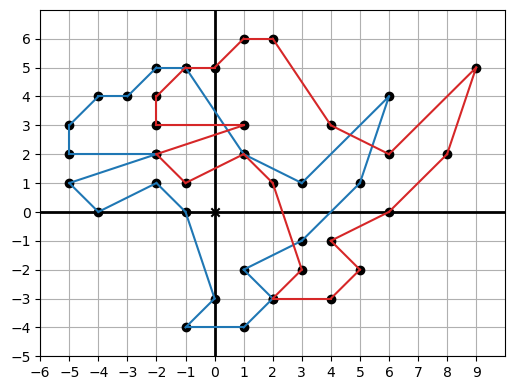

In [62]:
dinos = [(x,y) for x,y,_ in translated]
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*dinos),
    Polygon(*dinos, color=red)
)


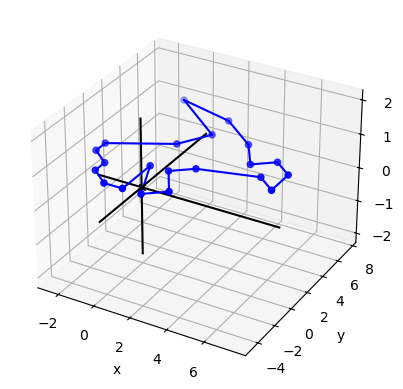

In [70]:
rotate_and_translate = (
    (0,-1,3),
    (1,0,1),
    (0,0,1)
)
rotated_translated_dino = [multiply_matrix_vector(rotate_and_translate, v) for v in dino_3d]
draw3d(
    Points3D(*rotated_translated_dino, color='blue'),
    *polygon_segments_3d(rotated_translated_dino)
)

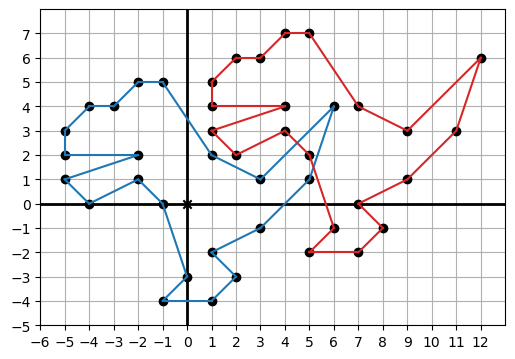

In [82]:
dino_3d_2z = [(x,y,2) for x,y in dino_vectors]
translated_2z = [multiply_matrix_vector(magic_matric, v) for v in dino_3d_2z]
dino_2z = [(x,y) for x,y,_ in translated_2z]
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*dino_2z),
    Polygon(*dino_2z, color=red)
)


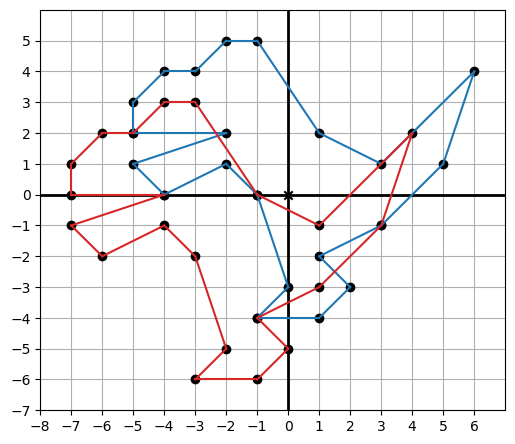

In [86]:
magic_matrix = [
    (1,0,-2),
    (0,1,-2),
    (0,0,1)
]
dino_3d = [(x,y,1) for x,y in dino_vectors]
translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]
translated_dino = [(x,y) for x,y,_ in translated]
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*translated_dino),
    Polygon(*translated_dino, color=red)
)

In [92]:
from vectors import rotate2d

In [94]:
from transforms import *

In [96]:
from math import pi

In [132]:
rotate_45_degrees = curry2(rotate2d)(pi/4)

In [134]:
rotation_matrix = infer_matrix(2, rotate_45_degrees)

In [136]:
rotation_matrix

((0.7071067811865476, -0.7071067811865475),
 (0.7071067811865475, 0.7071067811865476))

In [138]:
scale_half = curry2(scale)(1/2)

In [140]:
scale_matrix = infer_matrix(2, scale_half)

In [142]:
scale_matrix

((0.5, 0.0), (0.0, 0.5))

In [144]:
rotate_and_scale = matrix_multiply(scale_matrix, rotation_matrix)

In [146]:
rotate_and_scale

((0.3535533905932738, -0.35355339059327373),
 (0.35355339059327373, 0.3535533905932738))

In [148]:
((a,b),(c,d)) = rotate_and_scale

In [160]:
final_matrix = ((a,b,3),(c,d,1),(0,0,1))

In [162]:
final_matrix

((0.3535533905932738, -0.35355339059327373, 3),
 (0.35355339059327373, 0.3535533905932738, 1),
 (0, 0, 1))

In [164]:
[dot(row, (6, 4, 1)) for row in final_matrix]

[3.707106781186548, 4.535533905932738, 1]

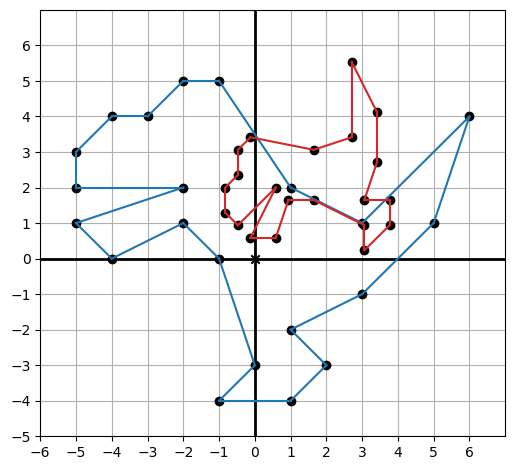

In [152]:
translated_rotated = [multiply_matrix_vector(final_matrix,v) for v in dino_3d]
final_dino = [(x,y) for x,y,_ in translated_rotated]
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*final_dino),
    Polygon(*final_dino, color=red)
)

In [166]:
def translate_3d(translation):
    def new_function(target):
        a,b,c = translation
        x,y,z = target
        matrix = (
            (1,0,0,a),
            (0,1,0,b),
            (0,0,1,c),
            (0,0,0,1)
        )
        vector = (x,y,z,1)
        x_out, y_out, z_out, _ = \
        multiply_matrix_vector(matrix,vector)
        return (x_out, y_out, z_out)
    return new_function

In [168]:
def translate_4d(translation):
    def new_function(target):
        a,b,c,d = translation
        x,y,z,w = target
        matrix = (
            (1,0,0,0,a),
            (0,1,0,0,b),
            (0,0,1,0,c),
            (0,0,0,1,e),
            (0,0,0,0,1)
        )
        vector = (x,y,z,w,1)
        x_out, y_out, z_out, w_out, _ = \
        multiply_matrix_vector(matrix, vector)
        return (x_out, y_out, z_out, w_out)
    return new_function

In [170]:
translate_4d((1,2,3,4))(10,20,30,40)

TypeError: translate_4d.<locals>.new_function() takes 1 positional argument but 4 were given